# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url + city)
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
#print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | armacao de buzios
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | ghanzi
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | vilhena
Processing Record 15 of Set 1 | jorpeland
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | fortaleza
Processing Record 19 of Set 1 | tralee
Processing Record 20 of Set 1 | alstonville
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | iqaluit
Processin

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=[
                "City","Lat","Lng","Max Temp","Humidity","Cloudiness",
                "Wind Speed","Country","Date"])

# Show Record Count
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,armacao de buzios,-22.7469,-41.8817,21.45,86,0,1.38,BR,1683176880
1,yellowknife,62.4560,-114.3525,13.09,50,27,2.68,CA,1683176983
2,waitangi,-43.9535,-176.5597,16.01,87,35,4.47,NZ,1683176983
3,nemuro,43.3236,145.5750,12.04,74,82,5.22,JP,1683176983
4,grytviken,-54.2811,-36.5092,3.25,98,100,4.95,GS,1683176918


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,armacao de buzios,-22.7469,-41.8817,21.45,86,0,1.38,BR,1683176880
1,yellowknife,62.4560,-114.3525,13.09,50,27,2.68,CA,1683176983
2,waitangi,-43.9535,-176.5597,16.01,87,35,4.47,NZ,1683176983
3,nemuro,43.3236,145.5750,12.04,74,82,5.22,JP,1683176983
4,grytviken,-54.2811,-36.5092,3.25,98,100,4.95,GS,1683176918


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

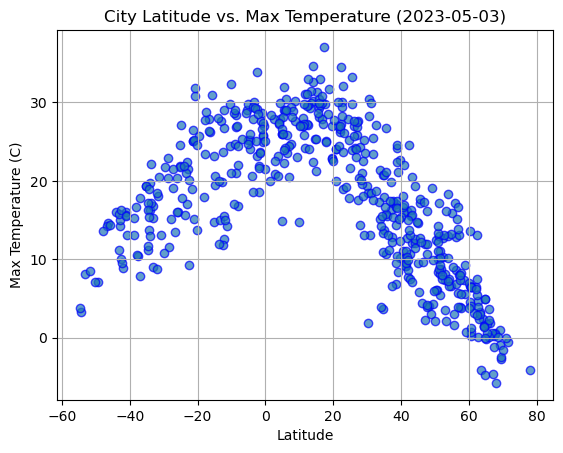

<Figure size 640x480 with 0 Axes>

In [50]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values, y_values, edgecolors='b', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-05-03)')
plt.grid()
plt.show()

# Incorporate the other graph properties

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

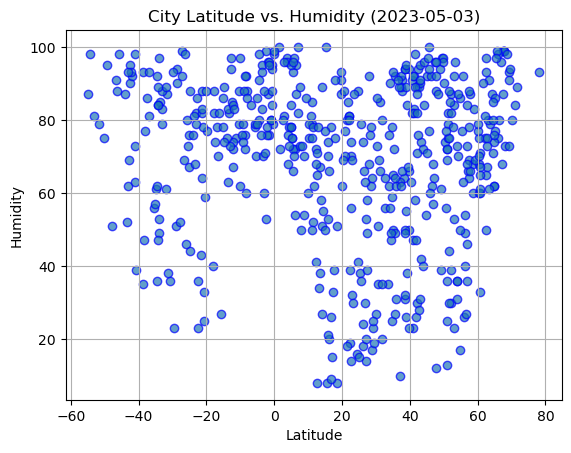

<Figure size 640x480 with 0 Axes>

In [52]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values, y_values, edgecolors='b', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (2023-05-03)')
plt.grid()
plt.show()

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

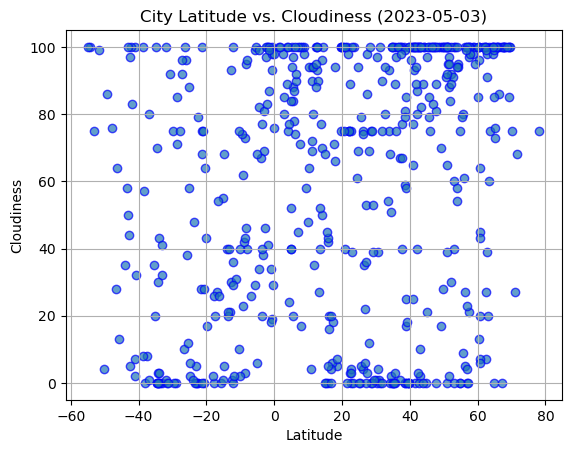

<Figure size 640x480 with 0 Axes>

In [54]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values, y_values, edgecolors='b', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (2023-05-03)')
plt.grid()
plt.show()

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

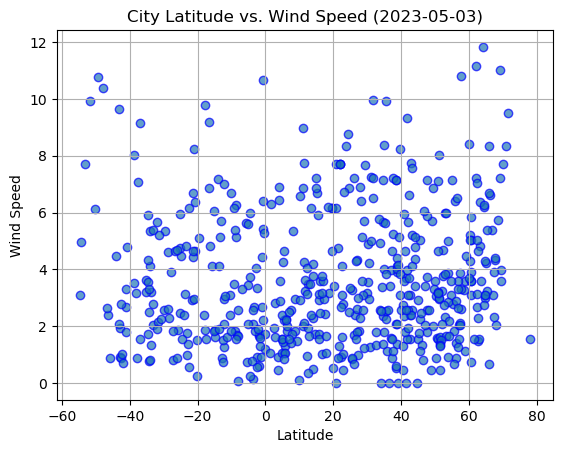

<Figure size 640x480 with 0 Axes>

In [55]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values, y_values, edgecolors='b', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (2023-05-03)')
plt.grid()
plt.show()

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots

def create_linear_reg(x,y,a,b):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print('The correlation between ' + x.name + ' and ' + y.name + ' is {:0.2f}'.format(y.corr(x)))

    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(f"{x.name} vs. {y.name} 2023-05-03")
    plt.grid()
    plt.show()


In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,13.09,50,27,2.68,CA,1683176983
3,nemuro,43.3236,145.5750,12.04,74,82,5.22,JP,1683176983
5,bilibino,68.0546,166.4372,-5.77,73,100,2.03,RU,1683176918
8,laguna,38.4210,-121.4238,14.43,64,100,2.06,US,1683176984
10,utrik,11.2278,169.8474,26.99,79,94,6.86,MH,1683176984


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,armacao de buzios,-22.7469,-41.8817,21.45,86,0,1.38,BR,1683176880
2,waitangi,-43.9535,-176.5597,16.01,87,35,4.47,NZ,1683176983
4,grytviken,-54.2811,-36.5092,3.25,98,100,4.95,GS,1683176918
6,port-aux-francais,-49.3500,70.2167,7.05,95,86,10.77,TF,1683176919
7,ghanzi,-21.5667,21.7833,18.92,43,28,2.93,BW,1683176983


###  Temperature vs. Latitude Linear Regression Plot

The correlation between Lat and Max Temp is -0.87


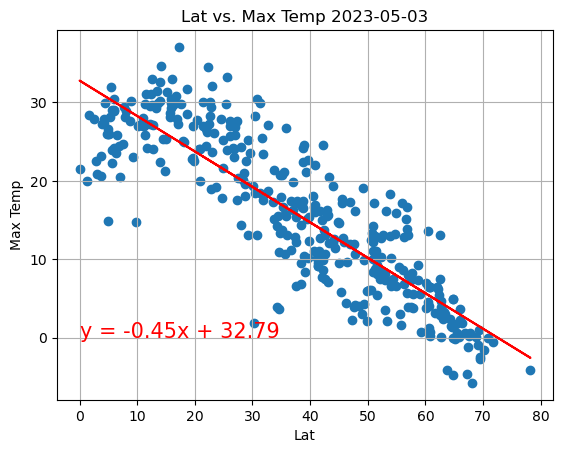

In [109]:
# Linear regression on Northern Hemisphere
create_linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],0,0)

The correlation between Lat and Max Temp is 0.73


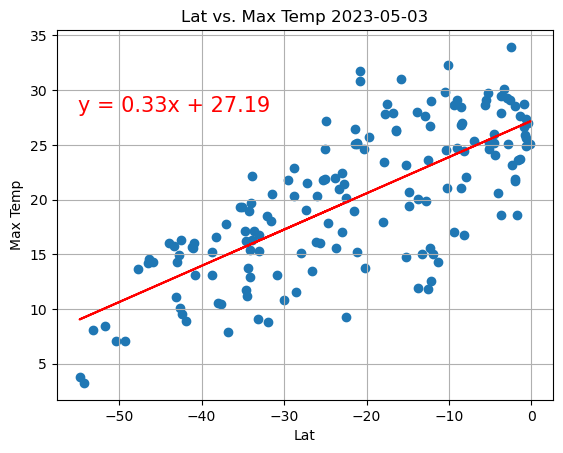

In [125]:
# Linear regression on Southern Hemisphere
create_linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],-55,28)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The correlation between Lat and Humidity is 0.12


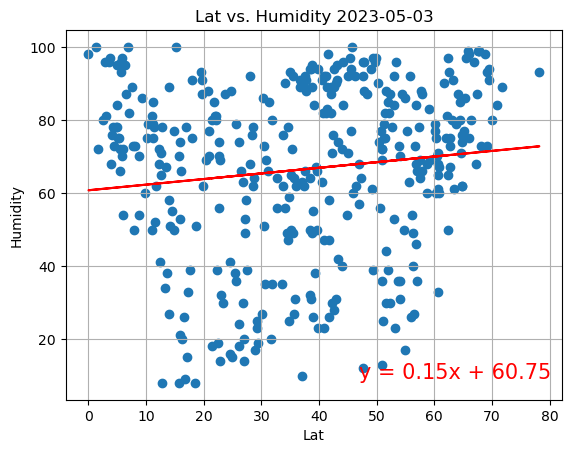

In [124]:
# Northern Hemisphere
create_linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],47,9)

The correlation between Lat and Humidity is 0.13


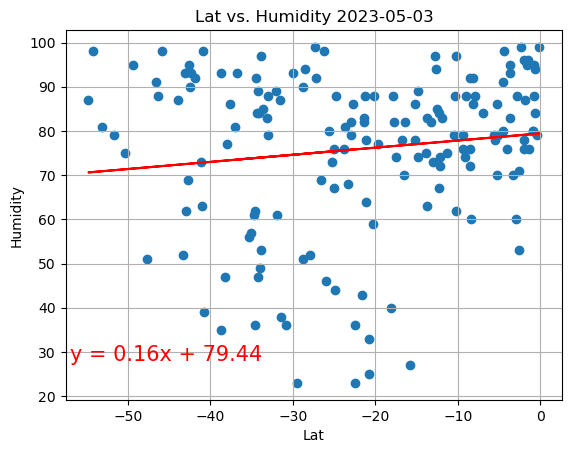

In [123]:
# Southern Hemisphere
create_linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],-57,28)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between Lat and Cloudiness is 0.11


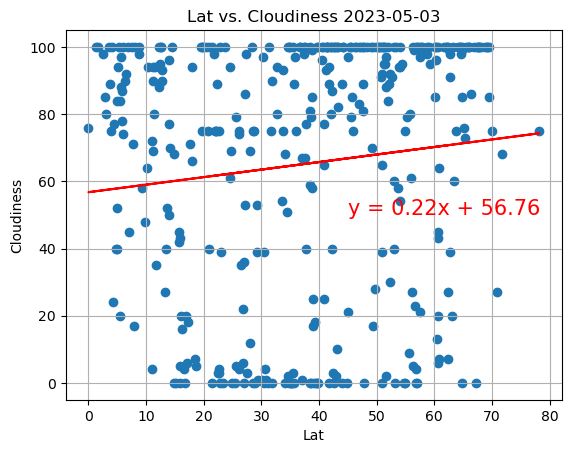

In [122]:
# Northern Hemisphere
create_linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],45,50)

The correlation between Lat and Cloudiness is 0.10


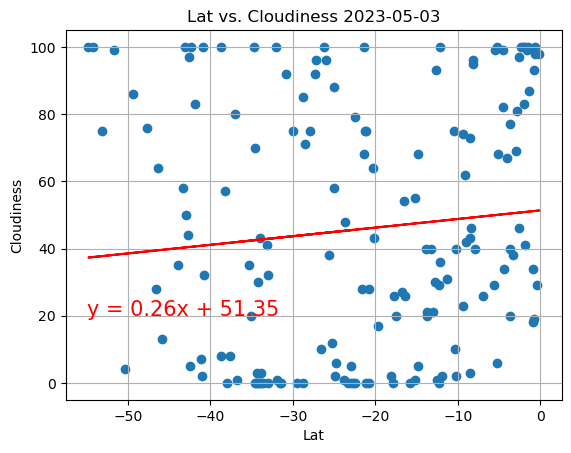

In [120]:
# Southern Hemisphere
create_linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],-55,20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between Lat and Wind Speed is 0.16


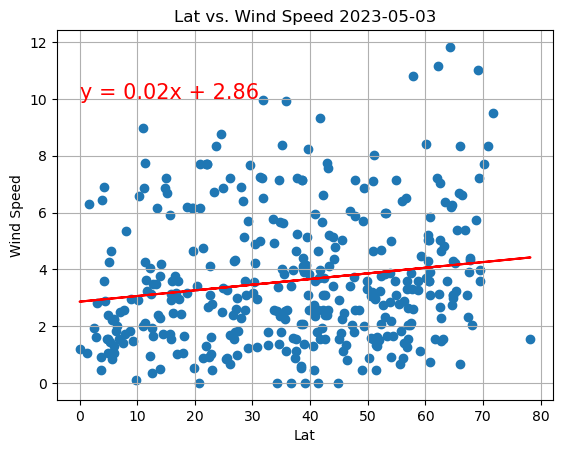

In [119]:
# Northern Hemisphere
create_linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],0,10)

The correlation between Lat and Wind Speed is -0.17


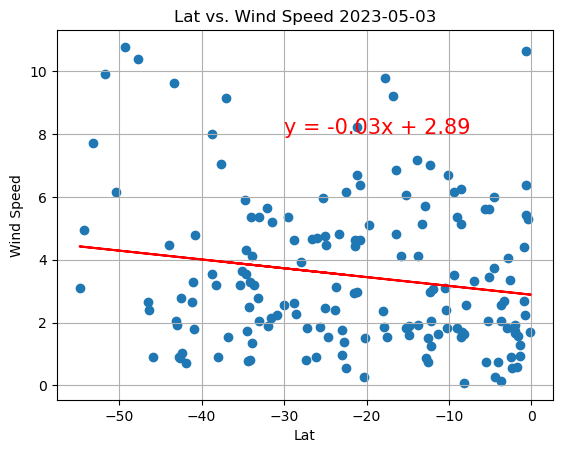

In [118]:
# Southern Hemisphere
create_linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],-30,8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE